## DERIVATIVE PRICING
MODULE 4 | LESSON 1


---



# **MARKOV'S PROPERTY AND GBM**


|  |  |
|:---|:---|
|**Reading Time** |  45 minutes |
|**Prior Knowledge** | Random numbers, SDE, GBM  |
|**Keywords** | GBM, Simulation |


---

*In Module 4, we will apply the same option-pricing concepts from before to a continuous-time framework. Our first step will be to work on understanding the kind of stochastic process that we will use to model stock prices. In the same spirit as the different paths we constructed in the binomial framework, we are going to build up some "paths" that model future stock price behavior.*

<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

## **1. Generating Random Numbers**

To start, let's see how we can define random numbers that follow a Wiener process (Brownian motion) in Python. The numpy module `random.randn` will allow us to generate random numbers under a standard normal distribution $N(0,1)$:

In [1]:
import numpy as np

X = np.random.randn(100)
X

array([-0.46283709,  1.19092479,  1.73463029,  1.18481997,  1.2079435 ,
       -0.65147674, -0.03441332, -0.37009483,  0.27907361,  0.48621341,
       -0.30560112, -0.66933331,  0.35131775, -0.39633043,  0.14075599,
       -0.25845515, -0.35329331, -1.18141779,  1.19269562, -2.78397603,
       -0.03305902, -0.9660646 , -0.89437683,  0.55946551,  0.54714522,
       -0.42479365,  0.1542976 ,  0.50075121, -1.36977576,  0.36903323,
        0.68728403,  0.52537901,  0.1641873 , -2.12820464,  0.82615596,
        0.16143873, -0.21477562,  0.9537074 ,  0.37323827,  0.69545203,
        0.74496568, -1.05743626, -1.88877964,  0.14366067, -0.86349862,
       -0.04396791,  0.23042111, -1.18824026,  0.72617817, -1.6759264 ,
       -1.71270615, -0.31143746,  0.75446821, -1.19101452, -1.95053202,
        0.31488681,  0.26104313,  0.59096125, -0.92579542,  1.42012523,
        0.36202835, -0.65892084, -1.4838348 ,  0.30478628, -1.29025379,
       -0.18238551,  0.54074281, -0.0058245 , -0.97842283,  2.04

Obviously, since these are random numbers, every time we execute this code, the output numbers will change. Sometimes, however, it is desirable to always work with the "same" random numbers, especially to draw comparisons between different results and modeling approaches. 

Random numbers in any programming language are generated following an algorithm in a not at all random way. These algorithms take a "random" seed as input and generate random numbers from it. Consequently, if we set the initial seed to always be the same value, the outcome of the np.random.rand(n) will always be the same!

In [2]:
np.random.seed(1)
X = np.random.randn(100)
X

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
       -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038,
        1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944,
       -1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521,
       -1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595,
       -0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547,
       -0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613,
       -0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416,
       -0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775,
       -0.63699565,  0.19091548,  2.10025514,  0.12015895,  0.61720311,
        0.30017032, -0.35224985, -1.1425182 , -0.34934272, -0.20889423,
        0.58662319,  0.83898341,  0.93110208,  0.28558733,  0.88514116,
       -0.75439794,  1.25286816,  0.51292982, -0.29809284,  0.48851815,
       -0.07557171,  1.13162939,  1.51981682,  2.18557541, -1.39

You can execute the previous code a few times to check that the random numbers generated are always the same as long as we do not change the seed.

This is a great thing to have when we have to draw comparisons between models or check the performance of our pricing algorithm. 



## **2. The Geometric Brownian Motion (GBM)**

Next, let's see how we can incorporate the random numbers generated in order to simulate our stock price paths under a geometric Browninan motion (GBM) process.

Note that the equations below on $dS$ and $S$ correspond to the same expressions you have in the slides. That is,

$dS = S_0 \left(\mu dt + \sigma dW_t \right)$


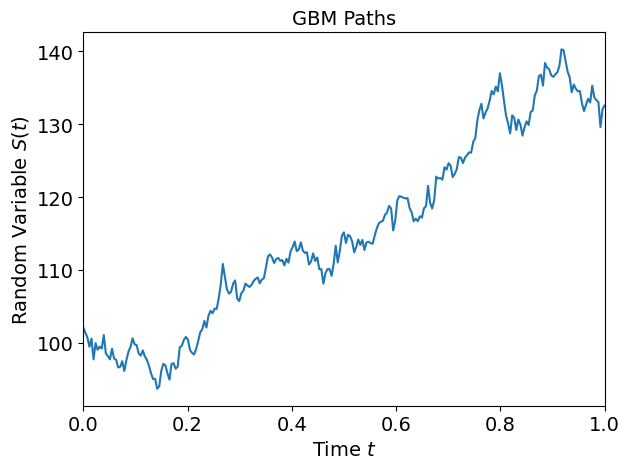

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure()
np.random.seed(1)
T = 1  # years
N = 255  # Number of points, number of subintervals = N-1
dt = T / N  # Time step in "years"
t = np.linspace(0, T, N)
M = 1  # Number of paths (Monte Carlo approach)
vol = 0.2
S0 = 100
mu = 0.1  # drift

dS = S0 * (mu * dt + vol * np.sqrt(dt) * np.random.randn(M, N))
S = S0 + np.cumsum(dS, axis=1)


for i in range(M):
    plt.plot(t, S[i, :])

plt.xlabel("Time $t$", fontsize=14)
plt.ylabel("Random Variable $S(t)$", fontsize=14)
plt.title("GBM Paths", fontsize=14)
axes = plt.gca()
axes.set_xlim([0, T])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In the previous graphs, you have the different paths generated with the GBM stochastic differential equation (SDE). 

Finally, let's explore how the returns from these price paths look in a histogram:

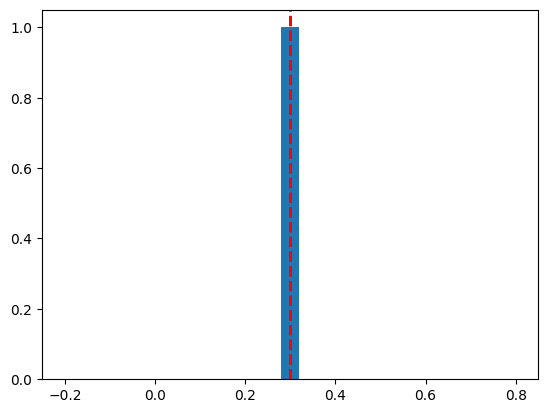

In [4]:
Returns = (S[:, -1] - S[:, 0]) / S[:, 0]
plt.hist(Returns, bins=25)

plt.axvline(np.percentile(Returns, 10), color="r", linestyle="dashed", linewidth=2)
plt.axvline(np.percentile(Returns, 90), color="r", linestyle="dashed", linewidth=2)

plt.show()

Once we have the complete distribution of simulated returns, we can observe some characteristics of it. We will get back to this in the future when we start trying to incorporate more real-life features (e.g., jumps in the price) in our modeling equations. For now, a very simple analysis can be done with the use of risk metrics like Value at Risk (VaR). The VaR will measure the maximum drop in the returns given a certain level of confidence (in terms of the probability distribution): 

In [ ]:
print(np.percentile(Returns, 5))  # Value at Risk at 5%

In this case, given the parameters of the GBM equation and simulated prices and returns, we could say that with 95% probability the stock will not drop more than 22% in a given day.



## **3. Conclusion**

In this lesson, we have seen how to generate random numbers and simulate stock price paths using the GBM equation. Let's now go to the next lesson, in which we will see how to analytically solve the previous SDE for the GBM process using Itö calculus.

---
Copyright 2025 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
